<a href="https://colab.research.google.com/github/muhmmadarifrahmandarmawan/Datase-Daun-Jambu-Biji-dan-Daun-Sirih_115_126/blob/main/115_126__UTS_KecerdasanBuatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

train_dir = "/content/gdrive/MyDrive/DATASET/train"
vald_dir = "/content/gdrive/MyDrive/DATASET/validation"

jambubiji_train_path = train_dir + "/Daun jambu biji"
sirih_train_path = train_dir + "/Daun Sirih"

jambubiji_vald_path = vald_dir + "/Daun jambu biji"
sirih_vald_path = vald_dir + "/Daun Sirih"

len_jambubiji_train = len(os.listdir(jambubiji_train_path))
len_sirih_train = len(os.listdir(sirih_train_path))
len_jambubiji_vald = len(os.listdir(jambubiji_vald_path))
len_sirih_vald = len(os.listdir(sirih_vald_path))

print("Panjang Dataset Training : ", len_jambubiji_train + len_sirih_train)
print("Panjang Dataset Validation : ", len_jambubiji_vald + len_sirih_vald)

print("\n")

print("Panjang Data Train jambubiji : ", len_jambubiji_train)
print("Panjang Data Train Sirih : ", len_sirih_train)
print("Panjang Data Validation jambubiji : ", len_jambubiji_vald)
print("Panjang Data Validation Sirih : ", len_sirih_vald)

Panjang Dataset Training :  100
Panjang Dataset Validation :  10


Panjang Data Train jambubiji :  50
Panjang Data Train Sirih :  50
Panjang Data Validation jambubiji :  5
Panjang Data Validation Sirih :  5


In [ ]:
train_jambubiji_fnames = os.listdir(jambubiji_train_path)
train_sirih_fnames = os.listdir(sirih_train_path)

print(train_jambubiji_fnames[:7])
print(train_sirih_fnames[:7])

['001.jpg', '002.jpg', '003.jpg', '004.jpg', '007.jpg', '005.jpg', '008.jpg']
['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

nrows = 5
ncols = 5

pic_index = 0

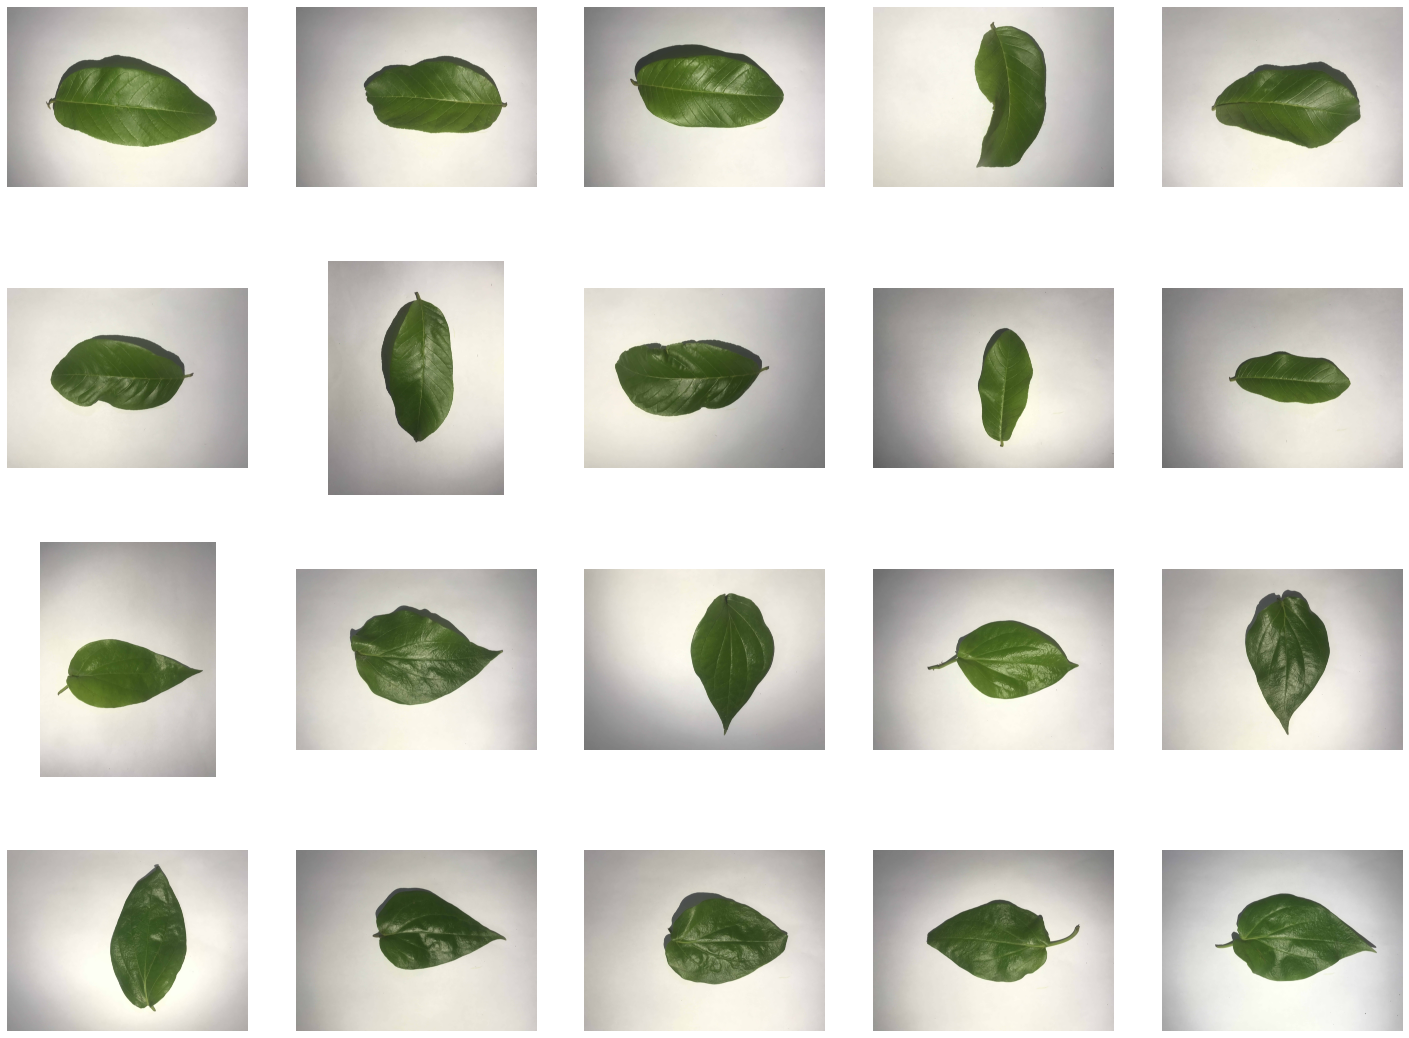

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*5, nrows*5)

pic_index += 10

next_jambubiji_pix = [os.path.join(jambubiji_train_path, fname)
for fname in train_jambubiji_fnames[pic_index-10:pic_index]
]

next_sirih_pix = [os.path.join(sirih_train_path, fname)
for fname in train_sirih_fnames[pic_index-10:pic_index]
]

for i, img_path in enumerate(next_jambubiji_pix + next_sirih_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mping.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1.0/255)
vald_datagen = ImageDataGenerator(rescale = 1.0/255.)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=2,
    class_mode='binary',
    target_size=(150, 150))


validation_generator = vald_datagen.flow_from_directory(vald_dir,
                                                    batch_size=2,
                                                    class_mode='binary',
                                                    target_size=(150, 150))


Found 100 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end (self,epoch,logs = {}):
    if(logs.get('accuracy') > 0.97):
      print("\n Akurasi mencapai > 97%")
      self.model.stop_training = True 

callbacks = myCallback()

In [ ]:
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) 
x = layers.Dense(125, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)


model = Model(img_input, output)

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 flatten_12 (Flatten)        (None, 67500)             0         
                                                                 
 dense_24 (Dense)            (None, 125)               8437625   
                                                                 
 dense_25 (Dense)            (None, 1)                 126       
                                                                 
Total params: 8,437,751
Trainable params: 8,437,751
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer=RMSprop(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=45,
      validation_data=validation_generator,
      validation_steps=5,  
)

Epoch 1/45
10/10 [==============================] - 5s 534ms/step - loss: 0.5410 - acc: 0.6000 - val_loss: 0.3724 - val_acc: 0.8000
Epoch 2/45
10/10 [==============================] - 5s 529ms/step - loss: 0.3137 - acc: 0.8500 - val_loss: 0.3117 - val_acc: 1.0000
Epoch 3/45
10/10 [==============================] - 5s 528ms/step - loss: 0.3328 - acc: 0.8000 - val_loss: 0.3055 - val_acc: 1.0000
Epoch 4/45
10/10 [==============================] - 5s 525ms/step - loss: 0.2977 - acc: 0.9500 - val_loss: 0.6071 - val_acc: 0.6000
Epoch 5/45
10/10 [==============================] - 5s 534ms/step - loss: 0.4881 - acc: 0.8000 - val_loss: 0.3584 - val_acc: 0.8000
Epoch 6/45
10/10 [==============================] - 5s 527ms/step - loss: 0.5042 - acc: 0.7500 - val_loss: 0.3106 - val_acc: 0.9000
Epoch 7/45
10/10 [==============================] - 6s 628ms/step - loss: 0.5196 - acc: 0.7500 - val_loss: 0.2931 - val_acc: 0.9000
Epoch 8/45
10/10 [==============================] - 6s 635ms/step - loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

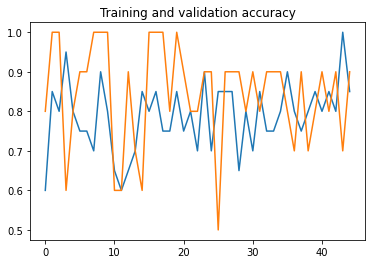

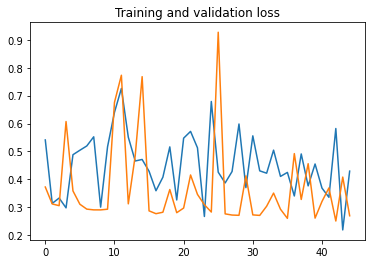

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Accuracy  : 0.7
Precision : 0.7083333333333333
f1Score : 0.6969696969696969
[[4 1]
 [2 3]]


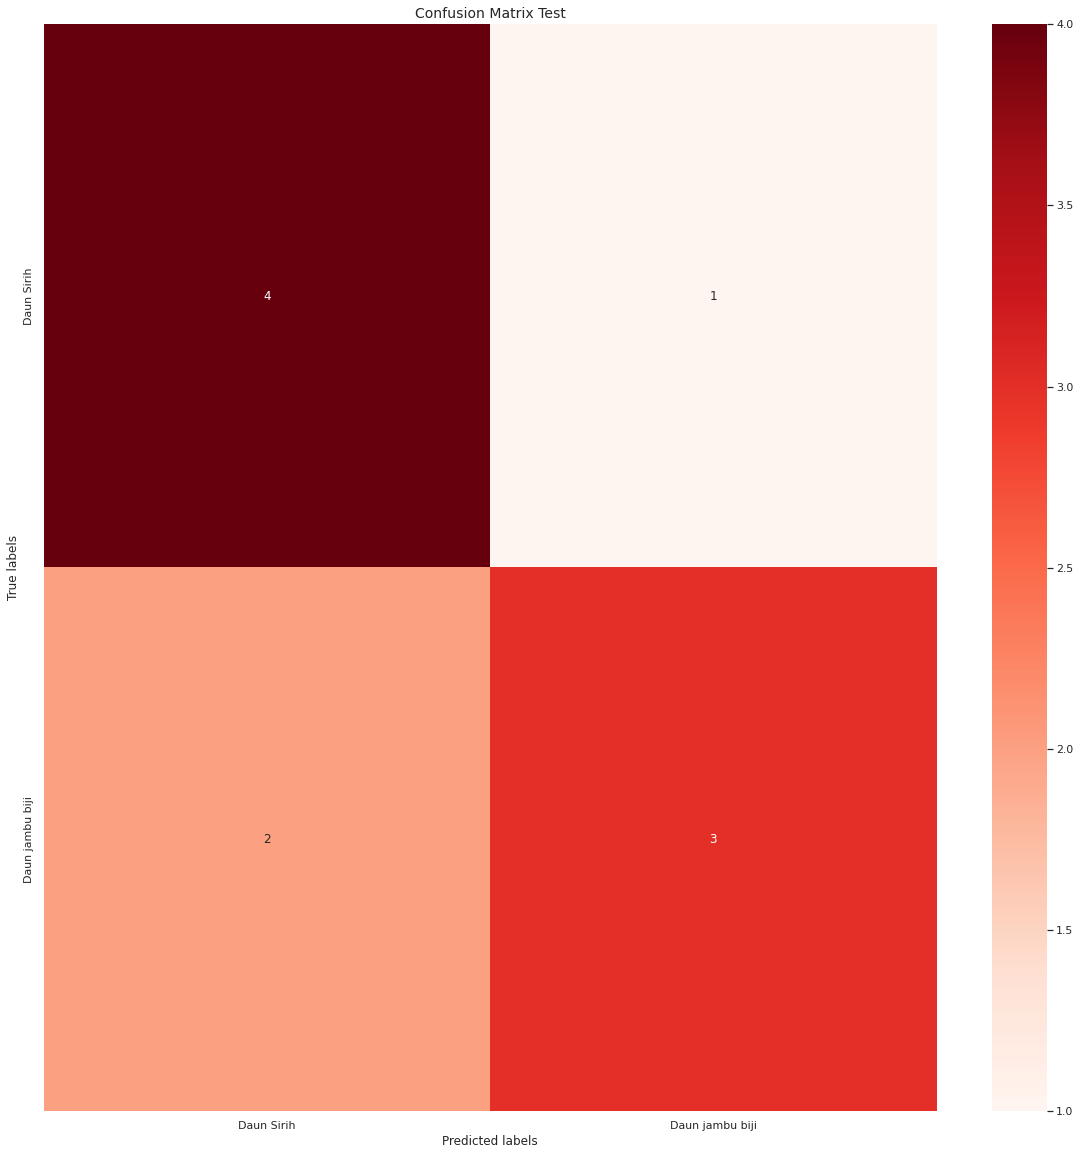

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model.predict_generator(generator=validation_generator)
yPredictions = predictions > 0.5
true_classes = validation_generator.classes
class_names = validation_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

                 precision    recall  f1-score   support

     Daun Sirih       0.67      0.80      0.73         5
Daun jambu biji       0.75      0.60      0.67         5

       accuracy                           0.70        10
      macro avg       0.71      0.70      0.70        10
   weighted avg       0.71      0.70      0.70        10



Saving 001.jpg to 001 (2).jpg
001.jpg
Daun jambubiji


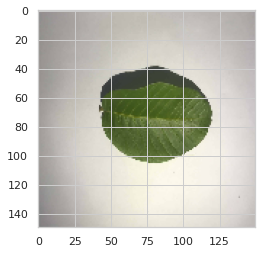

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=2)

  print (fn)
  if classes==0:
      print('Daun jambubiji')
  else :
      print('Daun Sirih')